# Import Libraries

In [1]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
from skimage import io, color, transform
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
import matplotlib.pyplot as plt
from skimage import io, color, transform
from PIL import Image
import streamlit as st
from joblib import dump

# Load and Preprocess Dataset

In [2]:
# Function to preprocess the images
def preprocess_image(image_path):
    # Load the image
    image = io.imread(image_path)
    # Convert the image to grayscale, ignoring alpha channel if present
    if image.shape[-1] == 4:  # Check if the image has an alpha channel
        image = image[:, :, :3]  # Keep only the first three channels (RGB)
    gray_image = color.rgb2gray(image)
    # Resize the image to a fixed size (e.g., 100x100)
    resized_image = transform.resize(gray_image, (128, 128))
    # Flatten the image into a 1D array
    flattened_image = resized_image.flatten()
    return flattened_image


# Load and preprocess dataset
def load_dataset(dataset_directory):
    images = []
    labels = []
    for root, dirs, files in os.walk(dataset_directory):
        for directory in dirs:
            label = directory
            directory_path = os.path.join(root, directory)
            for filename in os.listdir(directory_path):
                if filename.endswith(".jpg") or filename.endswith(".png"):
                    image_path = os.path.join(directory_path, filename)
                    preprocessed_image = preprocess_image(image_path)
                    images.append(preprocessed_image)
                    labels.append(label)
    X = np.array(images)
    y = np.array(labels)
    return X, y

# Load dataset
dataset_directory = "Brain_tumor/"
X, y = load_dataset(dataset_directory)

accuracy_rates = []


# Split the dataset into training and testing sets

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Training data

In [4]:
y_train

array(['normal', 'malignant', 'normal', 'benign', 'malignant', 'benign',
       'normal', 'benign', 'malignant', 'benign', 'benign', 'normal',
       'benign', 'malignant', 'malignant', 'normal', 'normal',
       'malignant', 'normal', 'normal', 'normal', 'malignant', 'benign',
       'malignant', 'normal', 'malignant', 'benign', 'malignant',
       'benign', 'malignant', 'malignant', 'benign', 'benign', 'benign',
       'malignant', 'malignant', 'malignant', 'benign', 'normal',
       'benign', 'benign', 'malignant', 'normal', 'normal', 'benign',
       'malignant', 'benign', 'benign', 'malignant', 'normal', 'normal',
       'malignant', 'benign', 'normal', 'malignant', 'normal',
       'malignant', 'malignant', 'normal', 'normal', 'malignant',
       'normal', 'malignant', 'malignant', 'normal', 'benign', 'normal',
       'malignant', 'malignant', 'normal', 'malignant', 'benign',
       'malignant', 'malignant', 'malignant', 'malignant', 'malignant',
       'malignant', 'normal', 'no

### Testing data

In [5]:
y_test

array(['malignant', 'benign', 'malignant', 'malignant', 'benign',
       'benign', 'malignant', 'malignant', 'malignant', 'benign',
       'benign', 'malignant', 'benign', 'malignant', 'normal', 'benign',
       'normal', 'normal', 'malignant', 'malignant', 'malignant',
       'normal', 'normal', 'benign', 'malignant', 'malignant', 'benign',
       'malignant', 'malignant', 'malignant', 'normal', 'normal',
       'malignant', 'benign', 'benign', 'malignant', 'benign', 'normal',
       'benign', 'benign', 'benign', 'benign', 'malignant', 'malignant',
       'benign', 'benign', 'normal', 'malignant', 'malignant', 'benign',
       'normal', 'normal', 'normal', 'malignant', 'malignant',
       'malignant', 'normal', 'normal', 'normal', 'malignant',
       'malignant', 'normal'], dtype='<U9')

# Visualization of Sample Data

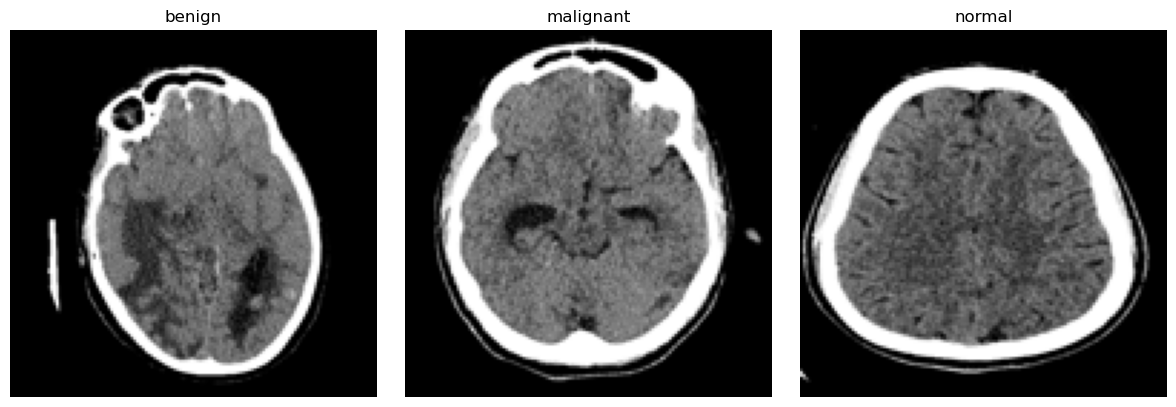

In [6]:

# List of categories (labels)
categories = ["benign", "malignant", "normal"]

# Set the figure size and subplot layout
plt.figure(figsize=(12, 4))
plt.subplots_adjust(wspace=0.2)  # Adjust spacing between subplots

# Iterate through each category
for i, category in enumerate(categories, start=1):
    # Directory path for the current category
    category_directory = os.path.join(dataset_directory, category)
    
    # Get list of image files in the category directory
    image_files = os.listdir(category_directory)
    
    # Choose a random sample image from the category
    sample_image_file = image_files[2]  # You can modify this to choose a different sample
    
    # Read the sample image
    sample_image_path = os.path.join(category_directory, sample_image_file)
    sample_image = Image.open(sample_image_path)
    
    # Resize the image
    sample_image = sample_image.resize((128, 128))  # Resize to desired dimensions
    
    # Display the sample image with its label
    plt.subplot(1, len(categories), i)
    plt.imshow(sample_image)
    plt.title(category)
    plt.axis('off')

# Show the plot
plt.tight_layout()
plt.show()


# Machine Learning(Classification)
#### Support Vector Machine (SVM) classifier
#### KNN(KNearest Neighbors) classifier
#### Decision Tree Classifier
#### Random Forest Classifier

## Support Vector Machine (SVM) classifier

In [7]:
# Train Support Vector Machine (SVM) classifier
svm_classifier = SVC()
svm_classifier.fit(X_train, y_train)


SVC()

In [8]:
#Print Accuracy
svm_pred = svm_classifier.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_pred)

svm_pred

array(['malignant', 'benign', 'malignant', 'malignant', 'benign',
       'benign', 'malignant', 'malignant', 'malignant', 'benign',
       'benign', 'malignant', 'benign', 'malignant', 'normal', 'benign',
       'normal', 'malignant', 'malignant', 'malignant', 'malignant',
       'normal', 'malignant', 'benign', 'malignant', 'malignant',
       'benign', 'malignant', 'malignant', 'malignant', 'normal',
       'normal', 'malignant', 'benign', 'benign', 'malignant',
       'malignant', 'malignant', 'benign', 'benign', 'benign',
       'malignant', 'malignant', 'malignant', 'benign', 'benign',
       'normal', 'malignant', 'malignant', 'malignant', 'malignant',
       'normal', 'normal', 'malignant', 'malignant', 'malignant',
       'normal', 'normal', 'normal', 'malignant', 'normal', 'normal'],
      dtype='<U9')

In [9]:
print("SVM Accuracy:", svm_accuracy * 100)
accuracy_rates.append(svm_accuracy)

SVM Accuracy: 87.09677419354838


In [10]:
# Generate classification report for SVM
svm_report = classification_report(y_test, svm_pred)
print("Classification Report for SVM:")
print(svm_report)

Classification Report for SVM:
              precision    recall  f1-score   support

      benign       1.00      0.84      0.91        19
   malignant       0.79      0.96      0.87        27
      normal       0.92      0.75      0.83        16

    accuracy                           0.87        62
   macro avg       0.90      0.85      0.87        62
weighted avg       0.89      0.87      0.87        62



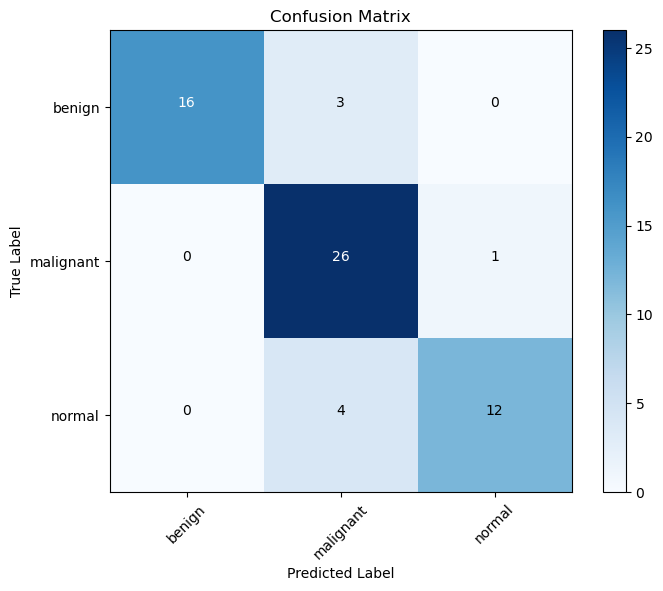

In [11]:
# Plot confusion matrix
cm = confusion_matrix(y_test, svm_pred)
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(set(y)))
plt.xticks(tick_marks, set(y), rotation=45)
plt.yticks(tick_marks, set(y))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
for i in range(len(set(y))):
    for j in range(len(set(y))):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > cm.max() / 2 else "black")
plt.show()


## KNN(KNearest Neighbors) classifier

In [12]:
# Train K-Nearest Neighbors (KNN) classifier
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)


KNeighborsClassifier()

In [13]:
#Print Accuracy
knn_pred = knn_classifier.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_pred)
print("KNN Accuracy:", knn_accuracy * 100)
accuracy_rates.append(knn_accuracy)


KNN Accuracy: 87.09677419354838


In [14]:
# Generate classification report for KNN classifier
knn_report = classification_report(y_test, knn_pred)
print("\nClassification Report for KNN:")
print(knn_report)


Classification Report for Random Forest:
              precision    recall  f1-score   support

      benign       0.89      0.89      0.89        19
   malignant       0.87      0.96      0.91        27
      normal       0.85      0.69      0.76        16

    accuracy                           0.87        62
   macro avg       0.87      0.85      0.86        62
weighted avg       0.87      0.87      0.87        62



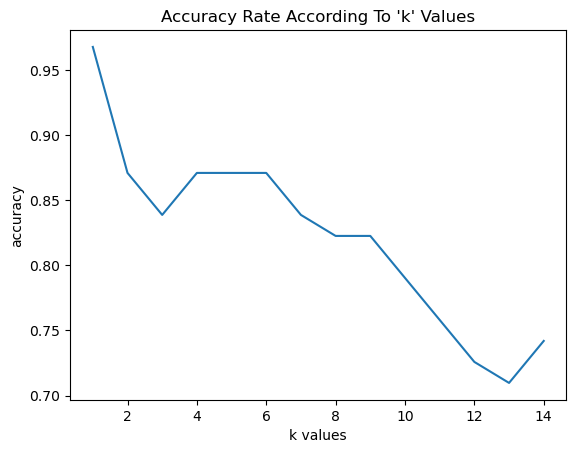

In [15]:
# find best "k" values
score_list = []
for each in range(1,15):
    knn2 = KNeighborsClassifier(n_neighbors = each)
    knn2.fit(X_train, y_train)
    score_list.append(knn2.score(X_test, y_test))

plt.plot(range(1,15), score_list)
plt.xlabel("k values")
plt.ylabel("accuracy")
plt.title("Accuracy Rate According To 'k' Values")
plt.show()

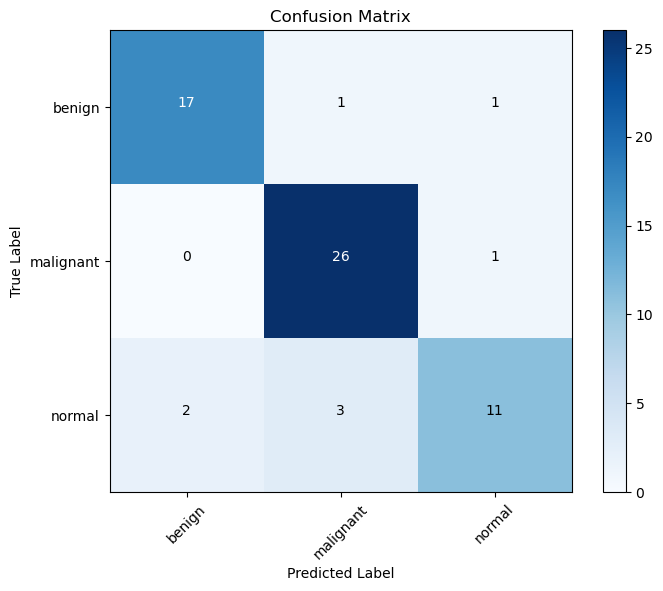

In [16]:
# Plot confusion matrix
cm = confusion_matrix(y_test, knn_pred)
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(set(y)))
plt.xticks(tick_marks, set(y), rotation=45)
plt.yticks(tick_marks, set(y))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
for i in range(len(set(y))):
    for j in range(len(set(y))):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > cm.max() / 2 else "black")
plt.show()

## Decision Tree Classifier

In [17]:
# Train Decision Tree classifier
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [18]:
#Print Accuracy
dt_pred = dt_classifier.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_pred)
print("Decision Tree Accuracy:", dt_accuracy * 100)
accuracy_rates.append(dt_accuracy)


Decision Tree Accuracy: 69.35483870967742


In [19]:
# Generate classification report for Decision Tree classifier
dt_report = classification_report(y_test, dt_pred)
print("\nClassification Report for Decision Tree:")
print(dt_report)


Classification Report for Random Forest:
              precision    recall  f1-score   support

      benign       0.82      0.74      0.78        19
   malignant       0.78      0.67      0.72        27
      normal       0.50      0.69      0.58        16

    accuracy                           0.69        62
   macro avg       0.70      0.70      0.69        62
weighted avg       0.72      0.69      0.70        62



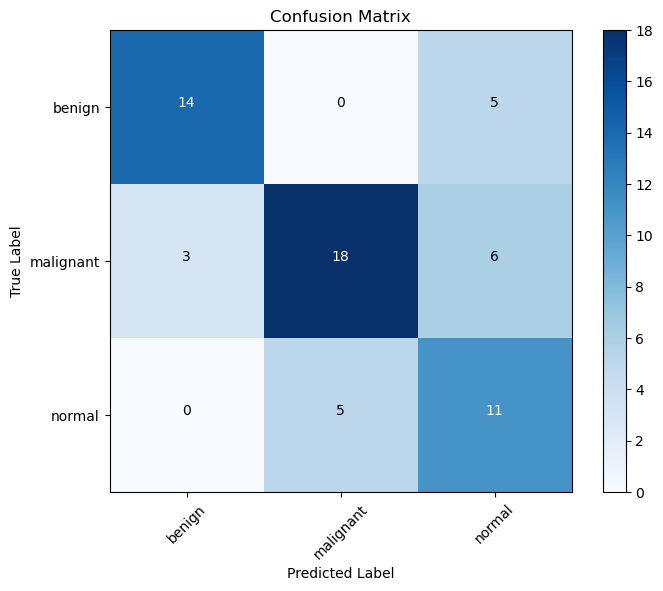

In [20]:
# Plot confusion matrix
cm = confusion_matrix(y_test, dt_pred)
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(set(y)))
plt.xticks(tick_marks, set(y), rotation=45)
plt.yticks(tick_marks, set(y))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
for i in range(len(set(y))):
    for j in range(len(set(y))):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > cm.max() / 2 else "black")
plt.show()


## Random Forest classifier

In [21]:
# Train Random Forest classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)


RandomForestClassifier()

In [22]:
#Print Accuracy
rf_pred = rf_classifier.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
print("Random Forest Accuracy:", rf_accuracy * 100)
accuracy_rates.append(rf_accuracy)


Random Forest Accuracy: 87.09677419354838


In [23]:
# Generate classification report for Random Forest
rf_report = classification_report(y_test, rf_pred)
print("\nClassification Report for Random Forest:")
print(rf_report)


Classification Report for Random Forest:
              precision    recall  f1-score   support

      benign       0.89      0.89      0.89        19
   malignant       0.83      0.89      0.86        27
      normal       0.93      0.81      0.87        16

    accuracy                           0.87        62
   macro avg       0.88      0.87      0.87        62
weighted avg       0.87      0.87      0.87        62



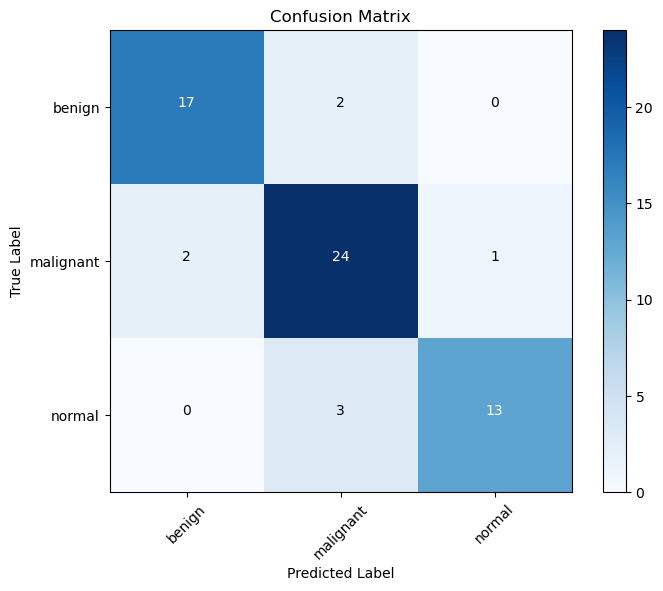

In [24]:
# Plot confusion matrix
cm = confusion_matrix(y_test, rf_pred)
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(set(y)))
plt.xticks(tick_marks, set(y), rotation=45)
plt.yticks(tick_marks, set(y))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
for i in range(len(set(y))):
    for j in range(len(set(y))):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > cm.max() / 2 else "black")
plt.show()



# Comparing Classification Rates

In [25]:
accuracy_rates

[0.8709677419354839,
 0.8709677419354839,
 0.6935483870967742,
 0.8709677419354839]

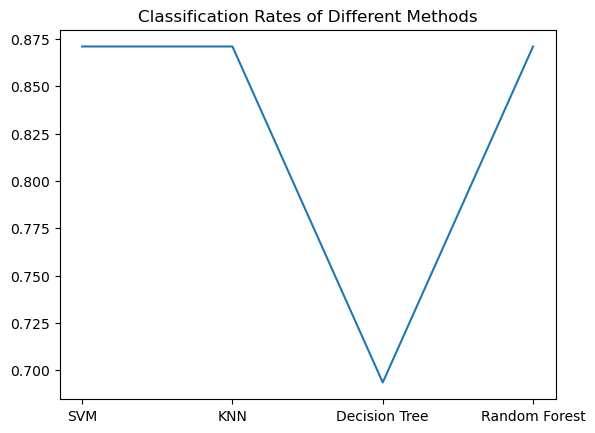

In [26]:
x = ["SVM", "KNN", "Decision Tree", "Random Forest"]
plt.plot(x,accuracy_rates)
plt.title("Classification Rates of Different Methods")
plt.show()

# save the Random Forest Classifier Model

In [27]:
# Save the model to a file
model_file = 'random_forest_model.joblib'
dump(rf_classifier, model_file)

['random_forest_model.joblib']